# Polar Cube: Reading and plotting

In [1]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

import matplotlib.pyplot as plt

from tqdm import tqdm
import xarray as xr
import numpy as np
import os

Create the data store from s3:

In [2]:
store = new_data_store("s3", root="deep-esdl-output")

Open the dataset:

In [3]:
da = store.open_data('polar-100m-1x2048x2048-v1.0.0.zarr')
da

<xarray.Dataset>
Dimensions:                                 (y: 21210, x: 19530, time: 2)
Coordinates:
  * time                                    (time) datetime64[ns] 2013-01-01 ...
  * x                                       (x) float64 -2.602e+06 ... -6.496...
  * y                                       (y) float64 -1.626e+06 ... 4.95e+05
Data variables:
    curie_depth_200km                       (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    curie_depth_300km                       (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_200km              (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_300km              (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_uncertainty_200km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    geothermal_heat_flow_uncertainty_300km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    ice_thickness                           (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    magnetic_anomaly                        (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    thw_124                                 (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    thw_142                                 (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    thw_170                                 (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    thw_70                                  (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes: (12/14)
    Conventions:          CF-1.10
    acknowledgment:       All ESDC data providers are acknowledged inside eac...
    contributor_name:     ['University of Leipzig', 'Brockmann Consult GmbH']
    contributor_url:      ['https://www.uni-leipzig.de/', 'https://www.brockm...
    creator_name:         ['University of Leipzig', 'Brockmann Consult GmbH']
    creator_url:          ['https://www.uni-leipzig.de/', 'https://www.brockm...
    ...                   ...
    project:              DeepESDL
    publisher_name:       DeepESDL Team
    publisher_url:        https://www.earthsystemdatalab.net/
    time_coverage_end:    2017-01-01
    time_coverage_start:  2013-01-01
    title:                Polar Data Cube v1.0.0

Plot static variables:

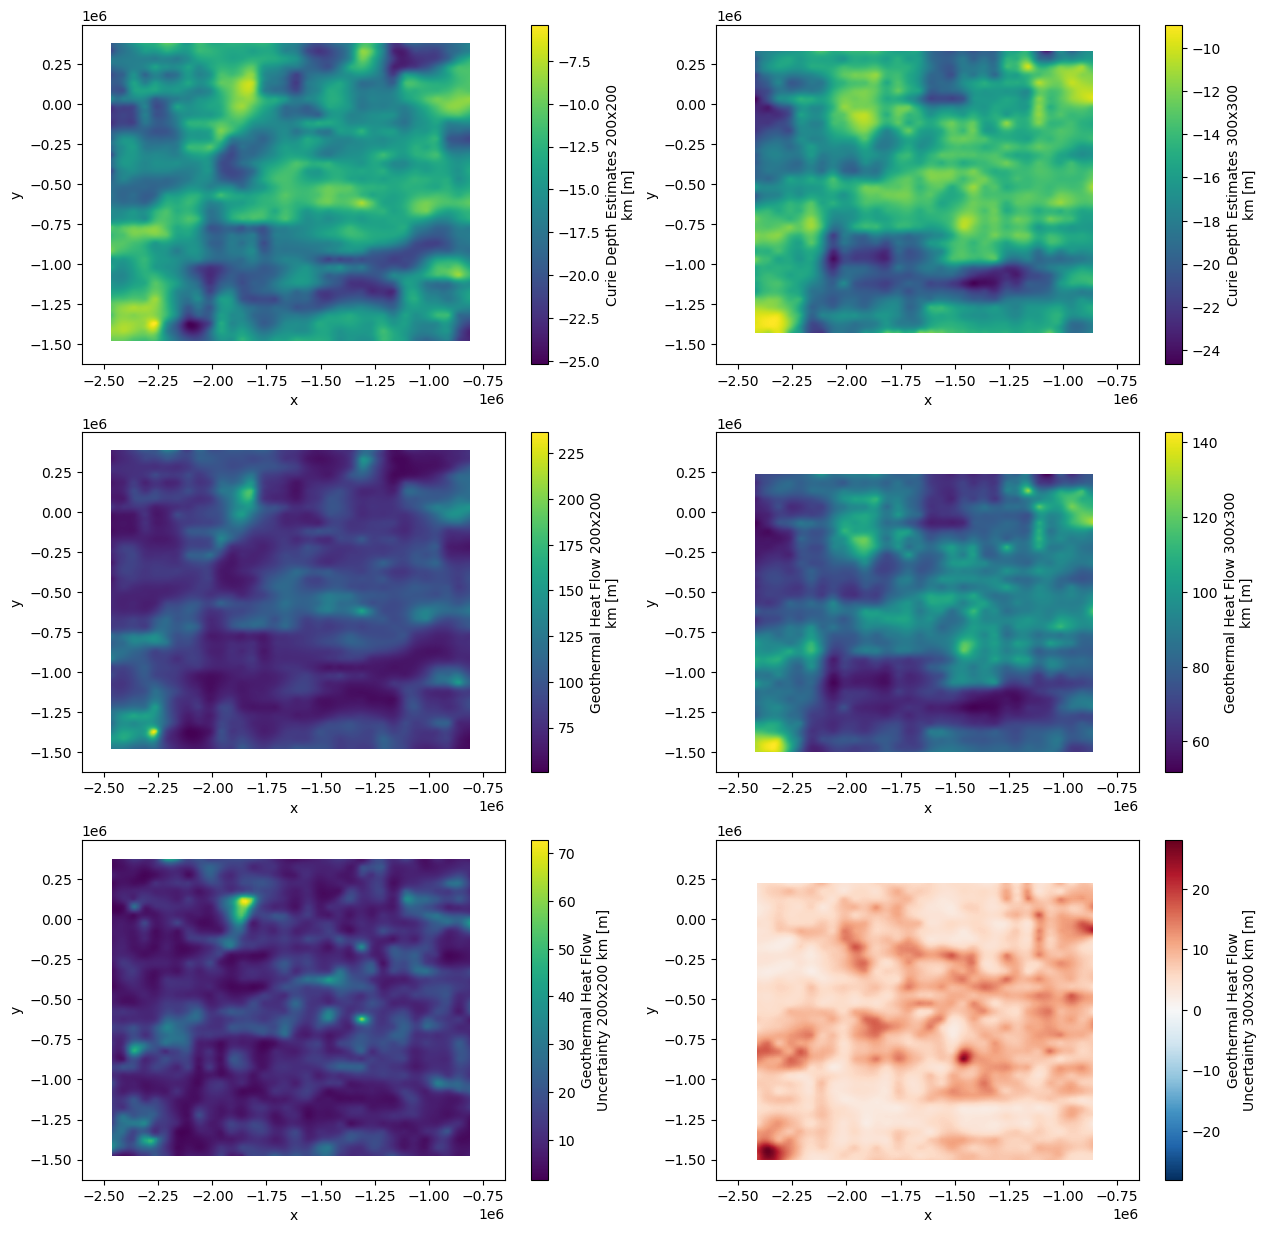

In [19]:
fig, axs = plt.subplots(3,2,figsize=(15,15))

da.curie_depth_200km.plot.imshow(ax = axs[0,0])
da.curie_depth_300km.plot.imshow(ax = axs[0,1])
da.geothermal_heat_flow_200km.plot.imshow(ax = axs[1,0])
da.geothermal_heat_flow_300km.plot.imshow(ax = axs[1,1])
da.geothermal_heat_flow_uncertainty_200km.plot.imshow(ax = axs[2,0])
da.geothermal_heat_flow_uncertainty_300km.plot.imshow(ax = axs[2,1])

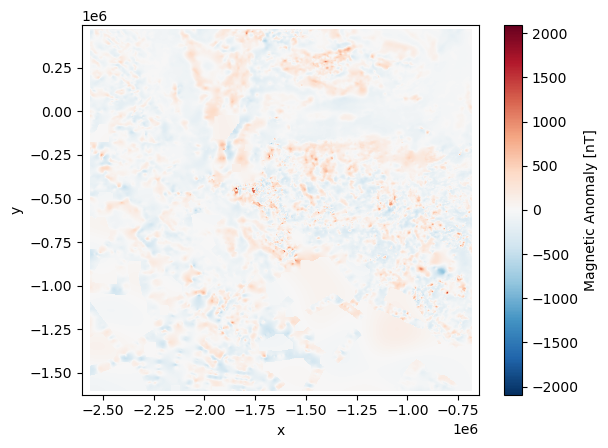

In [4]:
da.magnetic_anomaly.plot.imshow()

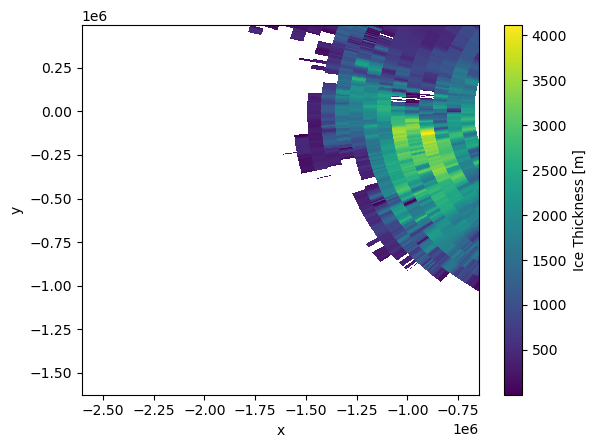

In [5]:
da.ice_thickness.plot.imshow()

Plot dynamic variables:

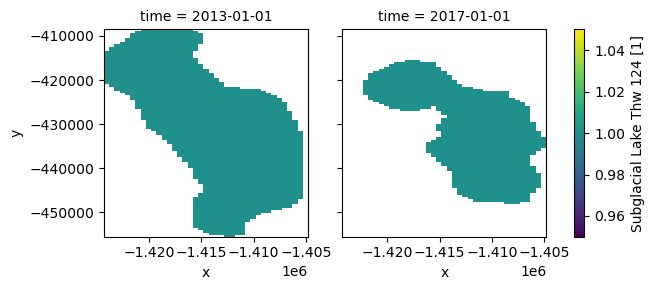

In [7]:
da.thw_124.dropna(dim="x",how="all").dropna(dim="y",how="all").plot.imshow(col="time")

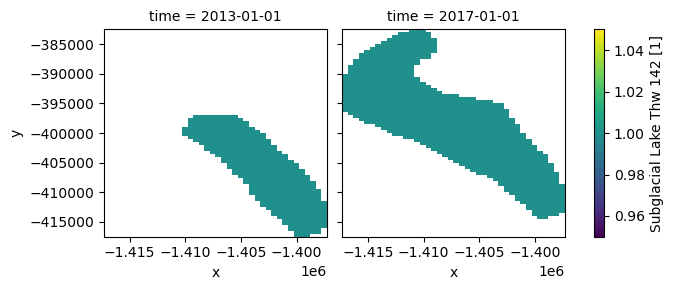

In [8]:
da.thw_142.dropna(dim="x",how="all").dropna(dim="y",how="all").plot.imshow(col="time")

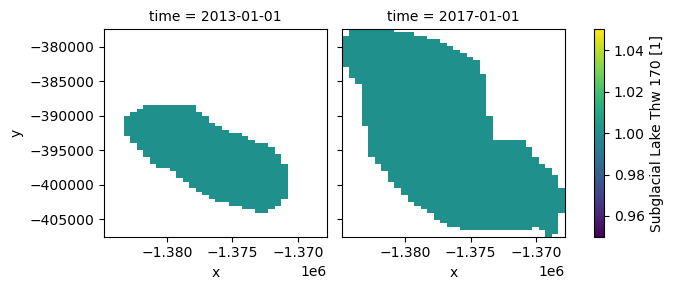

In [9]:
da.thw_170.dropna(dim="x",how="all").dropna(dim="y",how="all").plot.imshow(col="time")

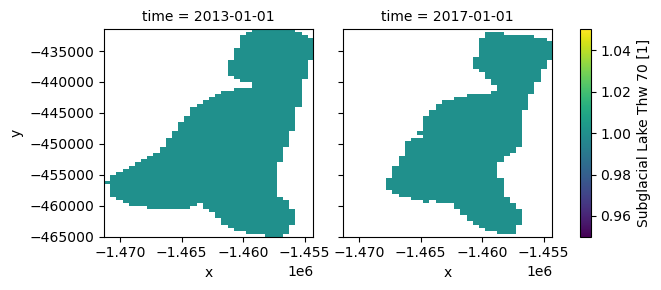

In [10]:
da.thw_70.dropna(dim="x",how="all").dropna(dim="y",how="all").plot.imshow(col="time")